In [10]:
import pandas as pd
df = pd.read_csv('transport_choice.csv')
df

,gender,car,travelCost,income,transport
0,male,0,cheap,low,bus
1,male,1,cheap,medium,bus
2,female,1,cheap,medium,train
3,female,0,cheap,low,bus
4,male,1,cheap,medium,bus
5,male,0,standard,medium,train
6,female,1,standard,medium,train
7,female,1,expensive,high,car
8,male,2,expensive,medium,car
9,female,2,expensive,high,car


In [11]:
x = df.drop('transport', axis=1)
x

,gender,car,travelCost,income
0,male,0,cheap,low
1,male,1,cheap,medium
2,female,1,cheap,medium
3,female,0,cheap,low
4,male,1,cheap,medium
5,male,0,standard,medium
6,female,1,standard,medium
7,female,1,expensive,high
8,male,2,expensive,medium
9,female,2,expensive,high


In [12]:
y = df['transport']
y

0      bus
1      bus
2    train
3      bus
4      bus
5    train
6    train
7      car
8      car
9      car
Name: transport, dtype: object

In [13]:
x

,gender,car,travelCost,income
0,male,0,cheap,low
1,male,1,cheap,medium
2,female,1,cheap,medium
3,female,0,cheap,low
4,male,1,cheap,medium
5,male,0,standard,medium
6,female,1,standard,medium
7,female,1,expensive,high
8,male,2,expensive,medium
9,female,2,expensive,high


# Preprocessing

In [14]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
x.gender = le.fit_transform(df['gender'])
x

,gender,car,travelCost,income
0,1,0,cheap,low
1,1,1,cheap,medium
2,0,1,cheap,medium
3,0,0,cheap,low
4,1,1,cheap,medium
5,1,0,standard,medium
6,0,1,standard,medium
7,0,1,expensive,high
8,1,2,expensive,medium
9,0,2,expensive,high


In [17]:
x.travelCost = le.fit_transform(df['travelCost'])
x.income = le.fit_transform(df['income'])
x

,gender,car,travelCost,income
0,1,0,0,1
1,1,1,0,2
2,0,1,0,2
3,0,0,0,1
4,1,1,0,2
5,1,0,2,2
6,0,1,2,2
7,0,1,1,0
8,1,2,1,2
9,0,2,1,0


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier()

In [20]:
clf.fit(x,y) #Train with full data set

DecisionTreeClassifier()

In [21]:
clf.predict([[1,0,0,1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['bus'], dtype=object)

# Show the tree

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.5\ngini = 0.66\nsamples = 10\nvalue = [4, 3, 3]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(0.2222222222222222, 0.375, 'x[3] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]')]

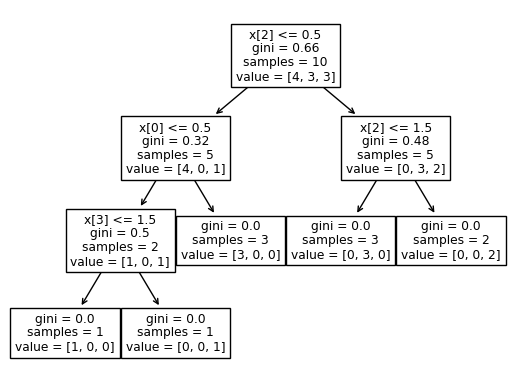

In [23]:
from sklearn import tree
tree.plot_tree(clf)

In [24]:
x.columns

Index(['gender', 'car', 'travelCost', 'income'], dtype='object')

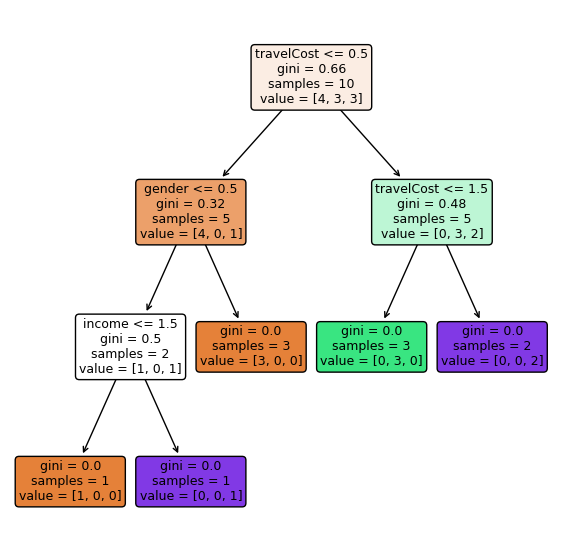

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('transportChoice.png')